# MIP result analysis

Comparison of CBC, HiGHS, CPLEX and SCIP on MIP model

In [1]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np

In [2]:
res_dir = "../../res/MIP"

cbc_time = []
highs_time = []
cplex_time = []
scip_time = []

for n in range(6, 24, 2):
    file_name = str(n) + ".json"
    file_path = os.path.join(res_dir, file_name)
    
    with open(file_path, "r") as f:
        data = json.load(f)
        
        cbc_time.append(data["CBC"]["time"])
        highs_time.append(data["HiGHS"]["time"])
        scip_time.append(data["SCIP"]["time"])
        
        # CPLEX did not stop at the timeout specified in the constructor
        if data["CPLEX"]["time"] > 300:
            cplex_time.append(300)
            data["CPLEX"]["optimal"] = False
        else:
            cplex_time.append(data["CPLEX"]["time"])
            

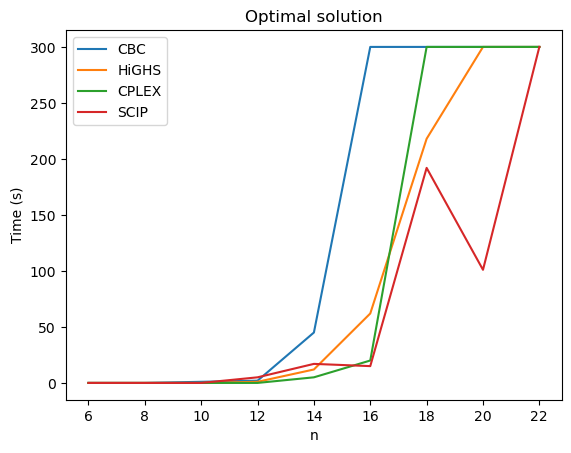

In [3]:
x = np.arange(6, 24, 2)  # number of teams

plt.plot(x, cbc_time, label="CBC")
plt.plot(x, highs_time, label="HiGHS")
plt.plot(x, cplex_time, label="CPLEX")
plt.plot(x, scip_time, label="SCIP")

plt.xlabel("n")
plt.ylabel("Time (s)")
plt.title("Optimal solution")

plt.legend()
plt.show()